# AVACADO PROJECT

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score,train_test_split, GridSearchCV
from scipy.stats import zscore
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:/Users/user/Desktop/DT Python/Data-Science-ML-Capstone-Projects-master/avocado.csv")
df               

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [4]:
df.drop('Unnamed: 0',inplace=True,axis=1)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [5]:
df.describe(include='all')

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,1517,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517,1517.000000,1517
unique,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,51
top,12-04-2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conventional,NaN,California
freq,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1517,NaN,76
mean,NaN,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,NaN,2015.162821,NaN
std,NaN,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,NaN,0.369324,NaN
min,NaN,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,NaN,2015.000000,NaN
25%,NaN,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,NaN,2015.000000,NaN
50%,NaN,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,NaN,2015.000000,NaN
75%,NaN,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,NaN,2015.000000,NaN


In [6]:
df.isnull().sum()

Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [7]:
df.type

0        conventional
1        conventional
2        conventional
3        conventional
4        conventional
             ...     
16463             NaN
16464             NaN
16465             NaN
16466             NaN
16467             NaN
Name: type, Length: 16468, dtype: object

In [8]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

In [9]:
df.shape

(16468, 13)

In [10]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [11]:
df.iterrows

<bound method DataFrame.iterrows of              Date  AveragePrice  Total Volume     4046       4225    4770  \
0      27-12-2015          1.33      64236.62  1036.74   54454.85   48.16   
1      20-12-2015          1.35      54876.98   674.28   44638.81   58.33   
2      13-12-2015          0.93     118220.22   794.70  109149.67  130.50   
3      06-12-2015          1.08      78992.15  1132.00   71976.41   72.58   
4      29-11-2015          1.28      51039.60   941.48   43838.39   75.78   
...           ...           ...           ...      ...        ...     ...   
16463         NaN           NaN           NaN      NaN        NaN     NaN   
16464         NaN           NaN           NaN      NaN        NaN     NaN   
16465         NaN           NaN           NaN      NaN        NaN     NaN   
16466         NaN           NaN           NaN      NaN        NaN     NaN   
16467         NaN           NaN           NaN      NaN        NaN     NaN   

       Total Bags  Small Bags  Large Ba

In [12]:
df.info

<bound method DataFrame.info of              Date  AveragePrice  Total Volume     4046       4225    4770  \
0      27-12-2015          1.33      64236.62  1036.74   54454.85   48.16   
1      20-12-2015          1.35      54876.98   674.28   44638.81   58.33   
2      13-12-2015          0.93     118220.22   794.70  109149.67  130.50   
3      06-12-2015          1.08      78992.15  1132.00   71976.41   72.58   
4      29-11-2015          1.28      51039.60   941.48   43838.39   75.78   
...           ...           ...           ...      ...        ...     ...   
16463         NaN           NaN           NaN      NaN        NaN     NaN   
16464         NaN           NaN           NaN      NaN        NaN     NaN   
16465         NaN           NaN           NaN      NaN        NaN     NaN   
16466         NaN           NaN           NaN      NaN        NaN     NaN   
16467         NaN           NaN           NaN      NaN        NaN     NaN   

       Total Bags  Small Bags  Large Bags  

In [13]:
df.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


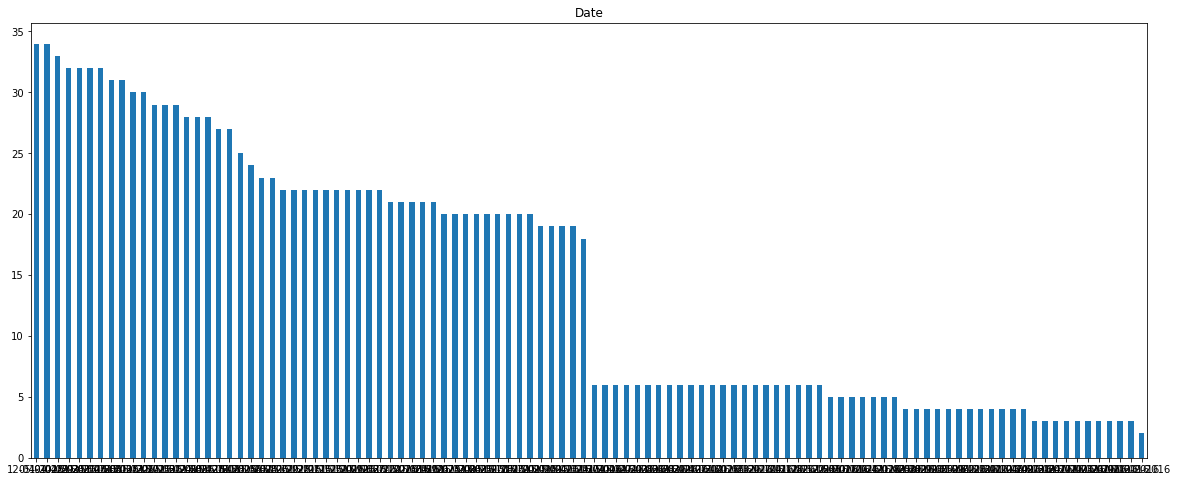

In [15]:
# Graphical Representation
plt.subplot()
df['Date'].value_counts().plot(kind='bar', title='Date', figsize=(20,8))
plt.xticks(rotation=0)
plt.show()

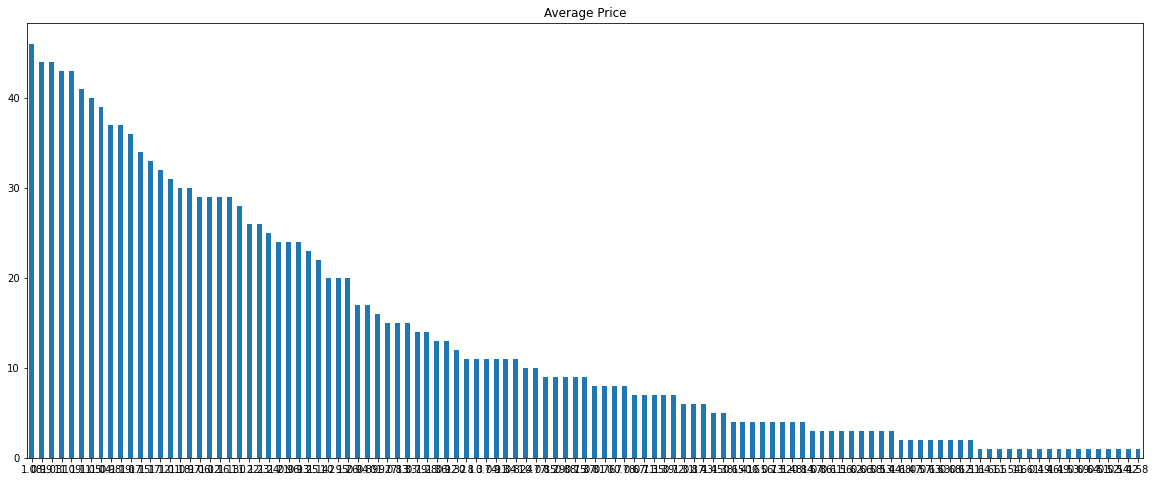

In [16]:
plt.subplot()
df['AveragePrice'].value_counts().plot(kind='bar', title='Average Price', figsize=(20,8))
plt.xticks(rotation=0)
plt.show()

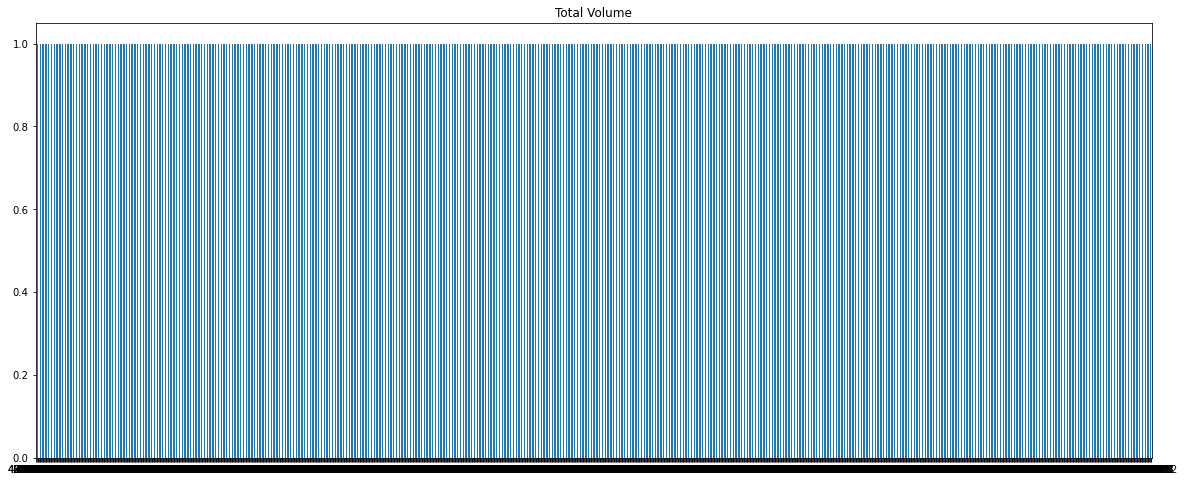

In [17]:
plt.subplot()
df['Total Volume'].value_counts().plot(kind='bar', title='Total Volume', figsize=(20,8))
plt.xticks(rotation=0)
plt.show()

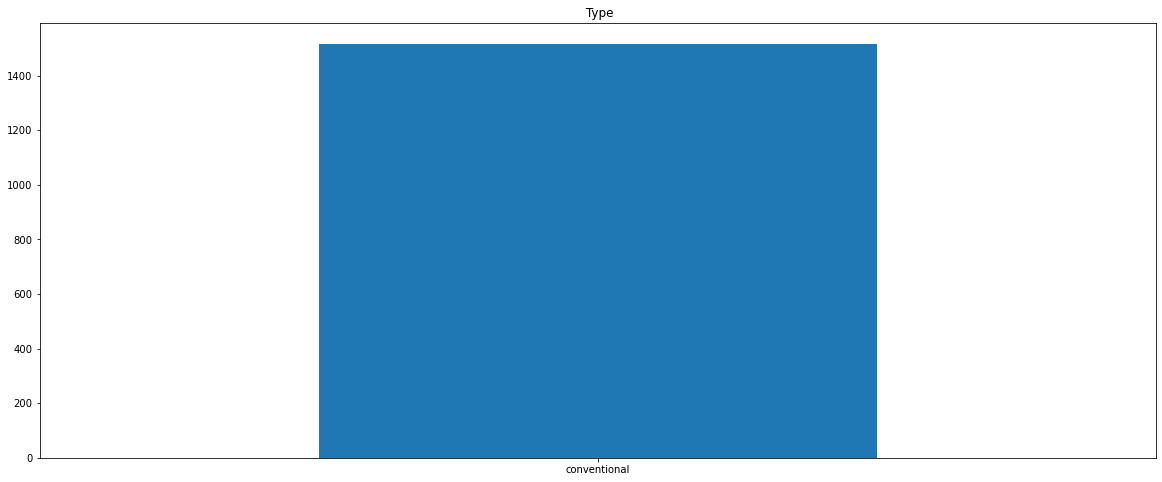

In [18]:
plt.subplot()
df['type'].value_counts().plot(kind='bar', title= ' Type', figsize=(20,8))
plt.xticks(rotation=0)
plt.show()

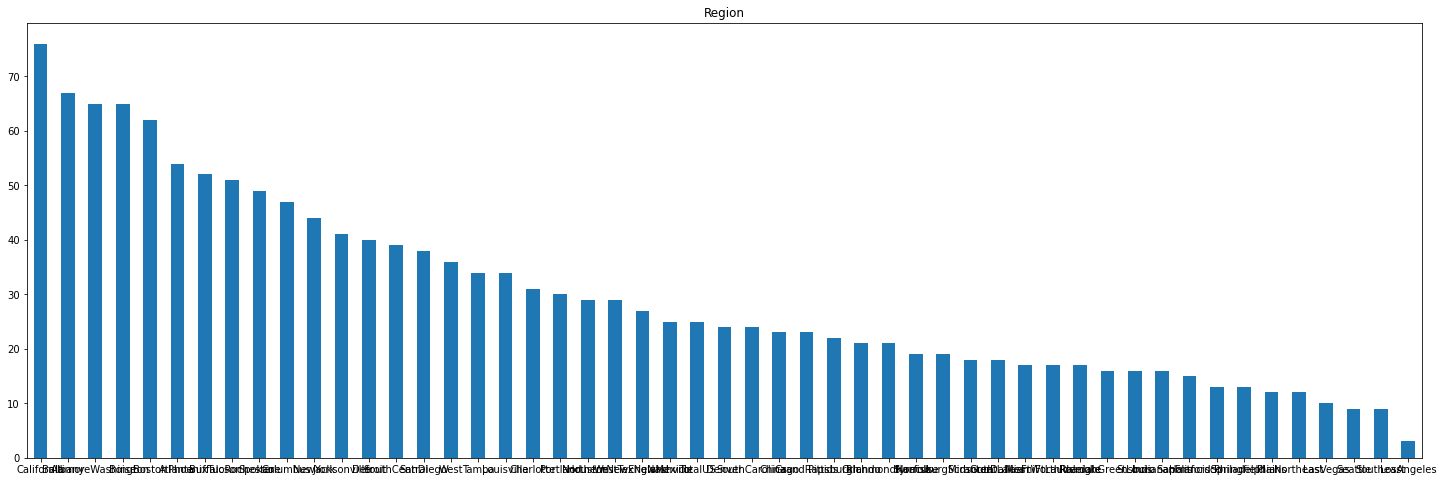

In [19]:
plt.subplot()
df['region'].value_counts().plot(kind='bar', title='Region' , figsize=(25,8))
plt.xticks(rotation=0)
plt.show()

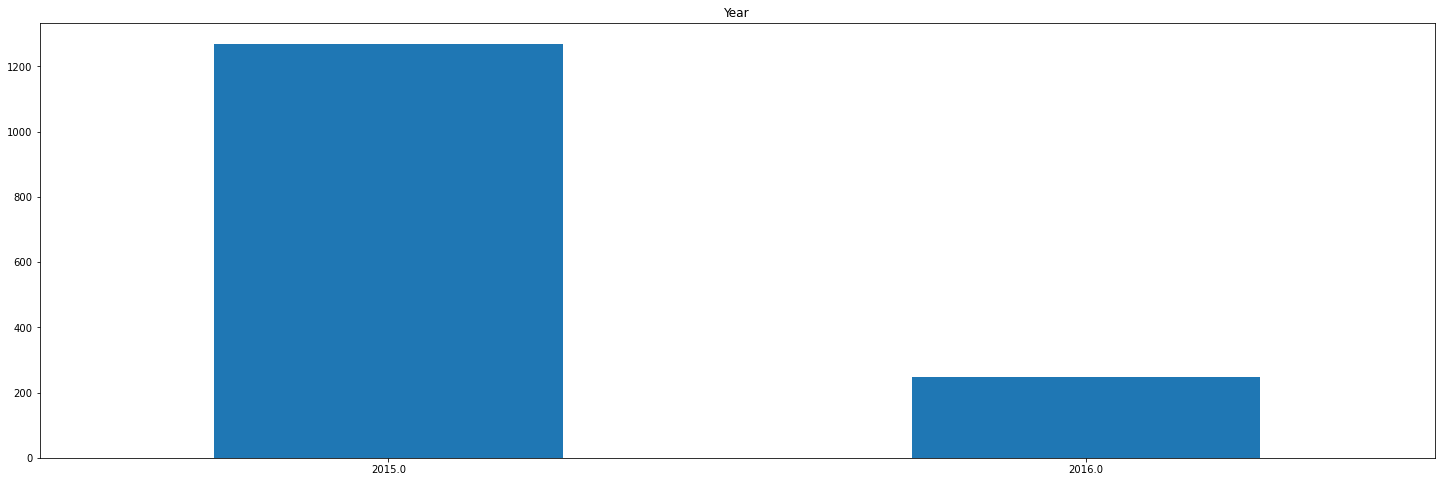

In [20]:
plt.subplot()
df['year'].value_counts().plot(kind='bar', title='Year' , figsize=(25,8))
plt.xticks(rotation=0)
plt.show()

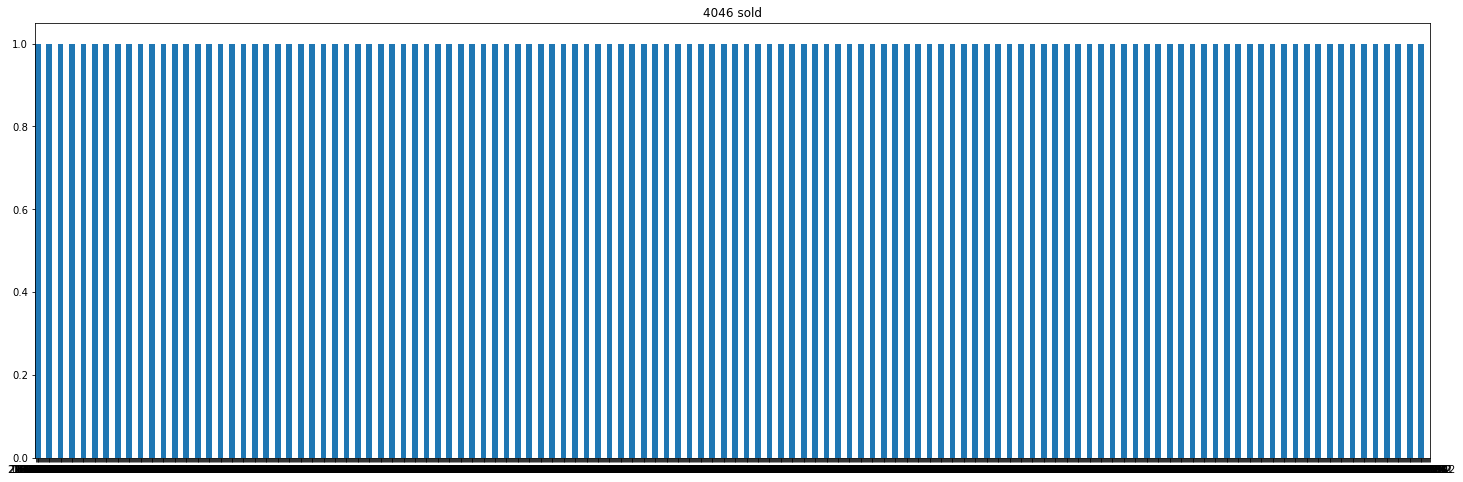

In [21]:
plt.subplot()
df['4046'].value_counts().plot(kind='bar', title='4046 sold' , figsize=(25,8))
plt.xticks(rotation=0)
plt.show()

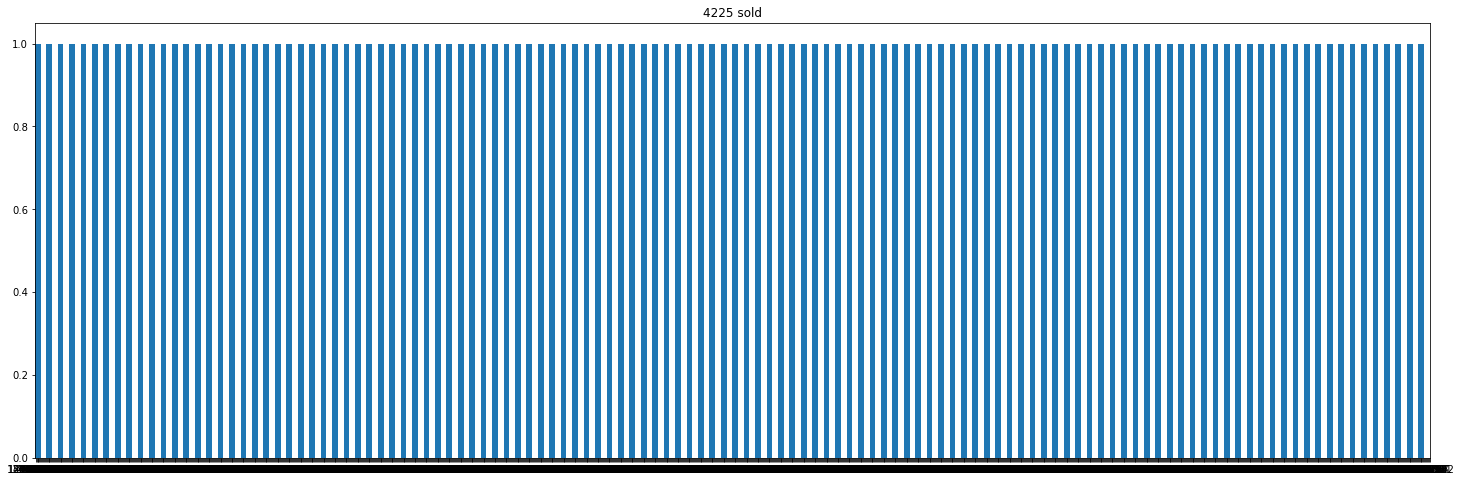

In [22]:
plt.subplot()
df['4225'].value_counts().plot(kind='bar', title='4225 sold' , figsize=(25,8))
plt.xticks(rotation=0)
plt.show()

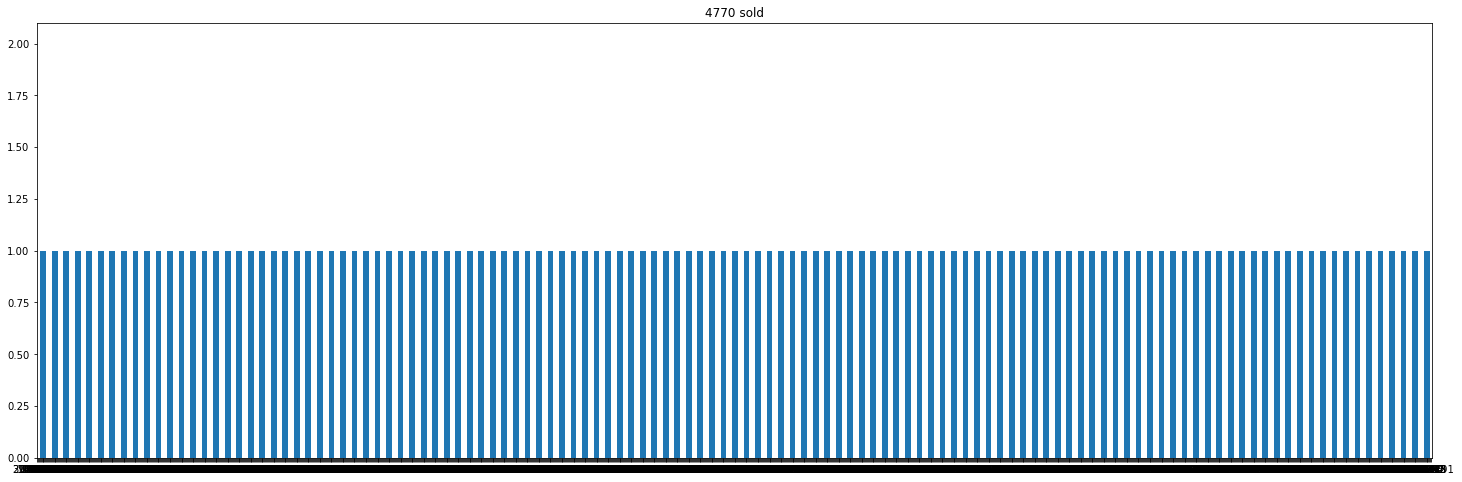

In [23]:
plt.subplot()
df['4770'].value_counts().plot(kind='bar', title='4770 sold' , figsize=(25,8))
plt.xticks(rotation=0)
plt.show()

<AxesSubplot:>

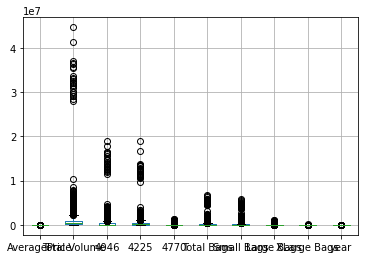

In [24]:
df.boxplot()

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

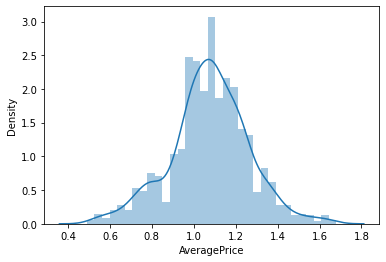

In [25]:
# Distribution plot
sns.distplot(df['AveragePrice'])

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

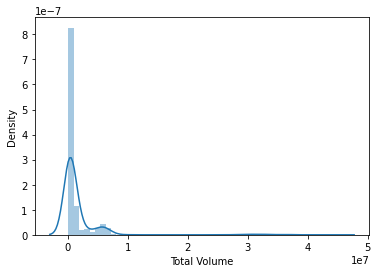

In [26]:
sns.distplot(df['Total Volume'])

<AxesSubplot:xlabel='year', ylabel='Density'>

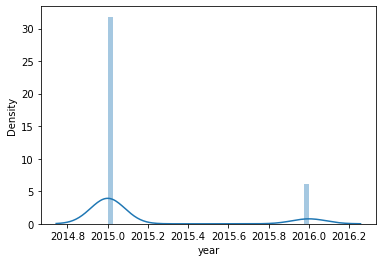

In [27]:
sns.distplot(df['year'])

<AxesSubplot:xlabel='4046', ylabel='Density'>

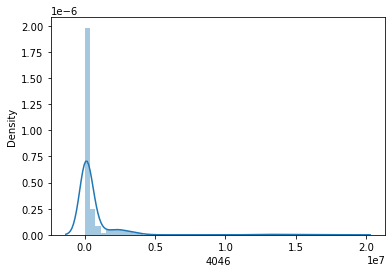

In [28]:
sns.distplot(df['4046'])

<AxesSubplot:xlabel='4225', ylabel='Density'>

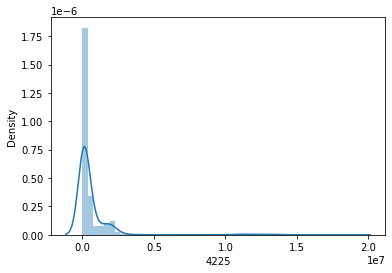

In [29]:
sns.distplot(df['4225'])

<AxesSubplot:xlabel='4770', ylabel='Density'>

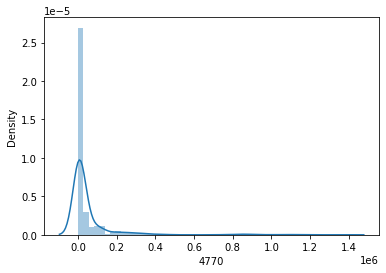

In [30]:
sns.distplot(df['4770'])

<AxesSubplot:>

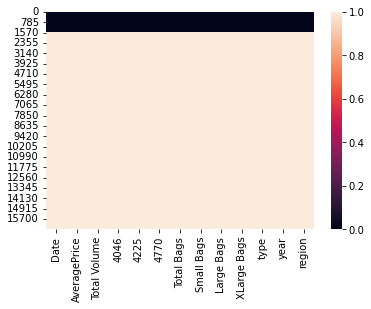

In [31]:
sns.heatmap(df.isnull())

<AxesSubplot:>

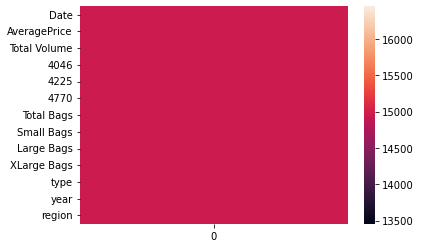

In [32]:
sns.heatmap(df.isnull().sum().to_frame())

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

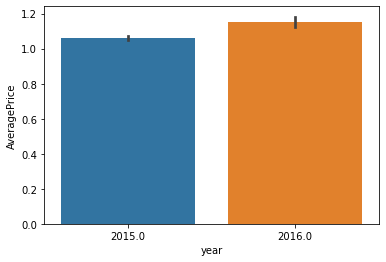

In [33]:
sns.barplot(x = "year" , y = "AveragePrice", data=df)

<AxesSubplot:xlabel='Date', ylabel='AveragePrice'>

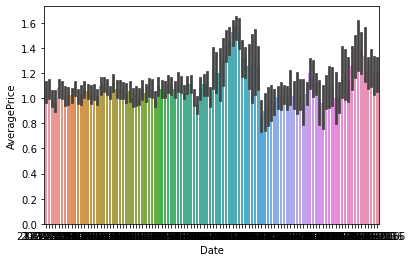

In [34]:
 sns.barplot(x = "Date" , y = "AveragePrice" , data=df)

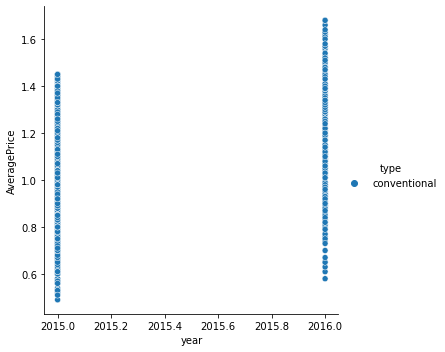

In [35]:
sns.relplot(x='year',  y='AveragePrice',  hue='type', data=df)

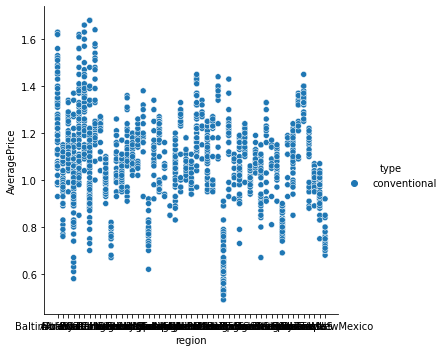

In [36]:
sns.relplot(x='region',  y='AveragePrice',  hue='type', data=df)

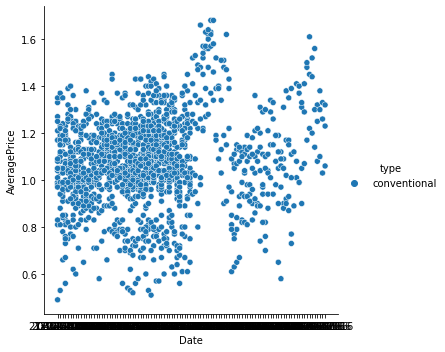

In [37]:
sns.relplot(x='Date',  y='AveragePrice',  hue='type', data=df)

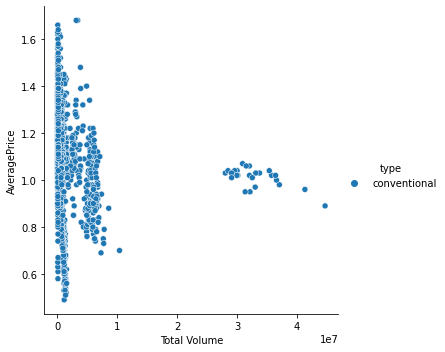

In [38]:
sns.relplot(x='Total Volume',  y='AveragePrice',  hue='type', data=df)

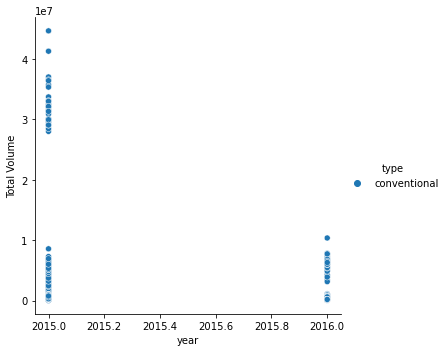

In [39]:
sns.relplot(x='year',  y='Total Volume',  hue='type', data=df)

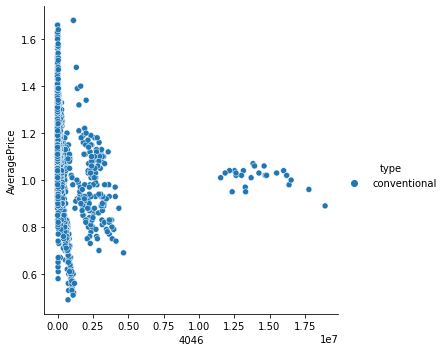

In [40]:
sns.relplot(x='4046',  y='AveragePrice',  hue='type', data=df)

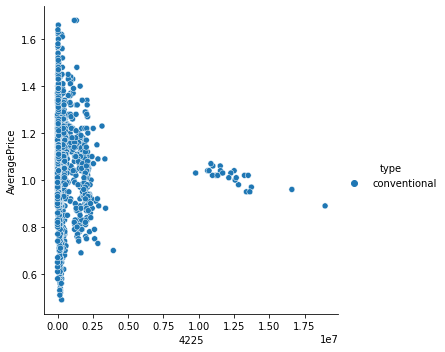

In [41]:
sns.relplot(x='4225',  y='AveragePrice',  hue='type', data=df)

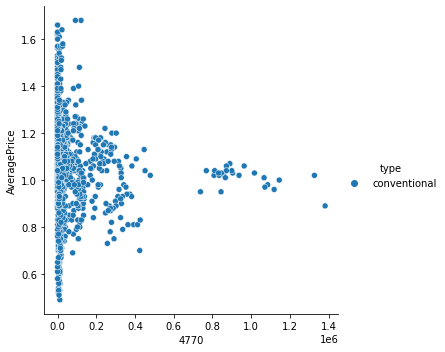

In [42]:
sns.relplot(x='4770',  y='AveragePrice',  hue='type', data=df)

<AxesSubplot:>

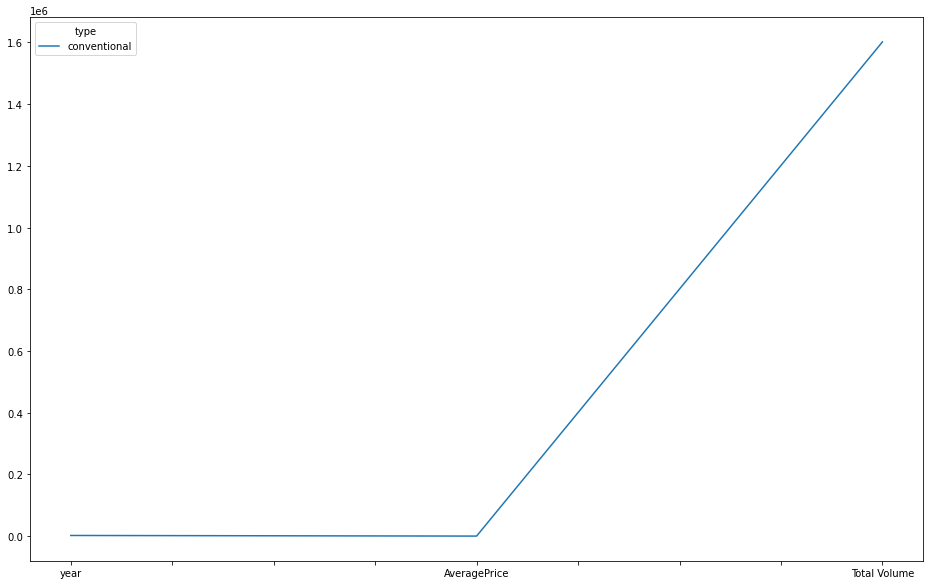

In [43]:
df.groupby('type')[['year' , 'AveragePrice' , 'Total Volume' ]].mean().T.plot(figsize=(16,10))

<AxesSubplot:>

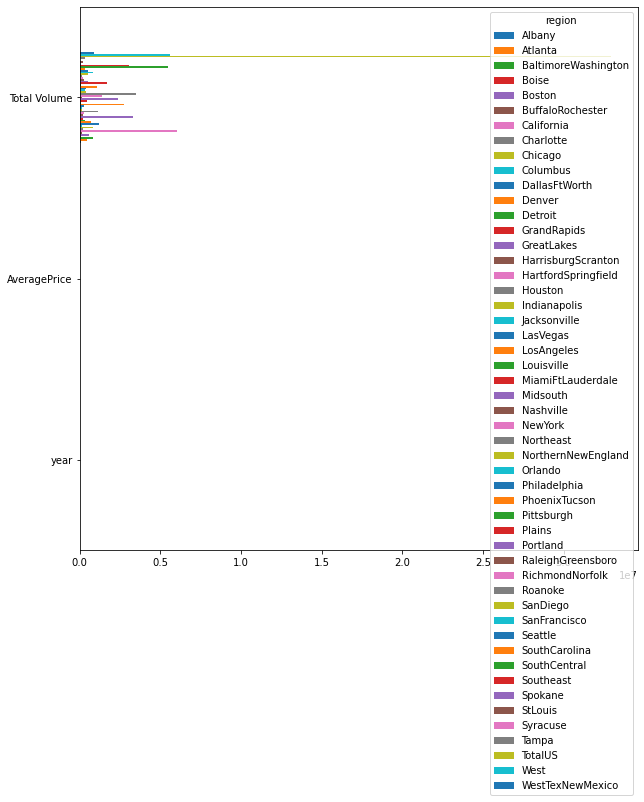

In [44]:
df.groupby('region')[['year' , 'AveragePrice' , 'Total Volume']].mean().T.plot(kind='barh' , figsize=(10,10))

<AxesSubplot:>

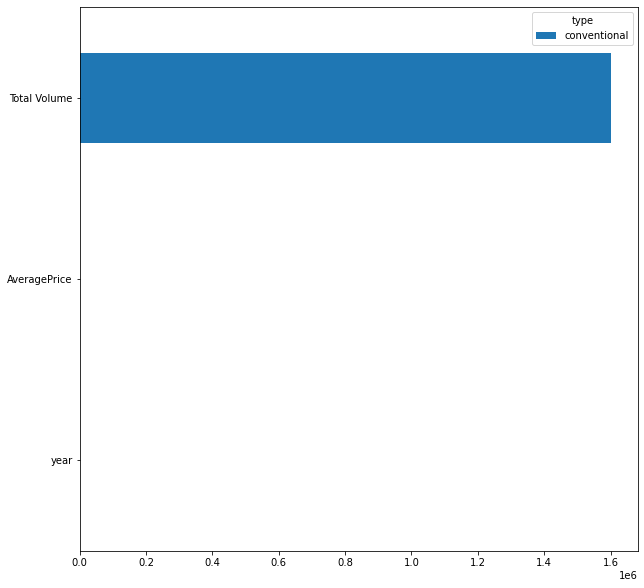

In [45]:
df.groupby('type')[['year' , 'AveragePrice' , 'Total Volume']].mean().T.plot(kind='barh' , figsize=(10,10))

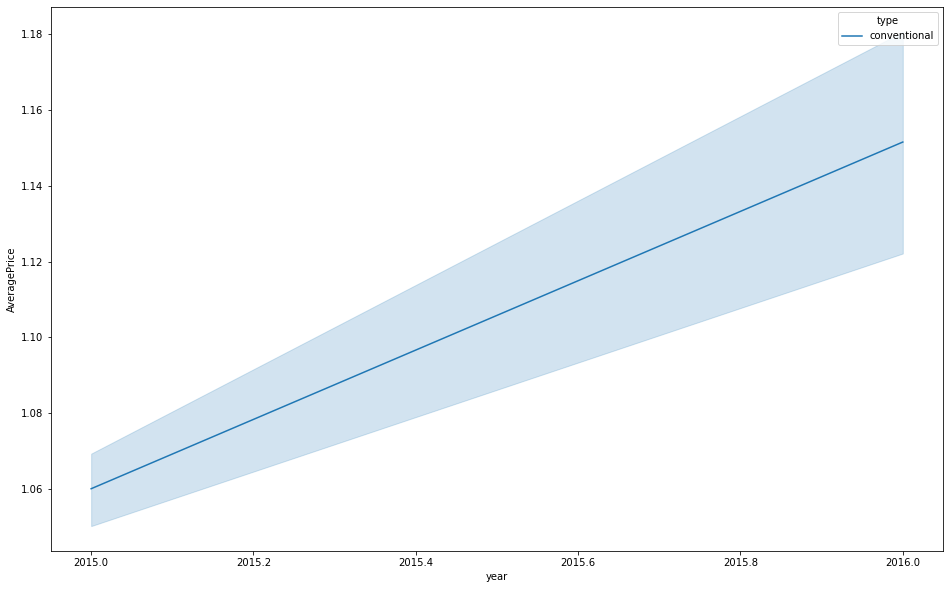

In [46]:
plt.figure(figsize=(16,10))
sns.lineplot(x="year" , y="AveragePrice" , hue="type" , data=df)
plt.show()

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   float64
 12  region        1517 non-null   object 
dtypes: float64(10), object(3)
memory usage: 1.6+ MB


In [48]:
df.isna().sum()

Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [49]:
df.isna().sum()/df.shape[0]*100

Date            90.788195
AveragePrice    90.788195
Total Volume    90.788195
4046            90.788195
4225            90.788195
4770            90.788195
Total Bags      90.788195
Small Bags      90.788195
Large Bags      90.788195
XLarge Bags     90.788195
type            90.788195
year            90.788195
region          90.788195
dtype: float64

<AxesSubplot:xlabel='AveragePrice', ylabel='type'>

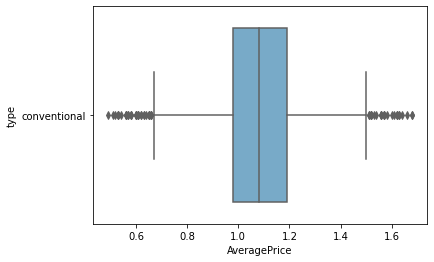

In [50]:
sns.boxplot(y="type", x="AveragePrice", data=df, palette='Blues')

<AxesSubplot:xlabel='AveragePrice'>

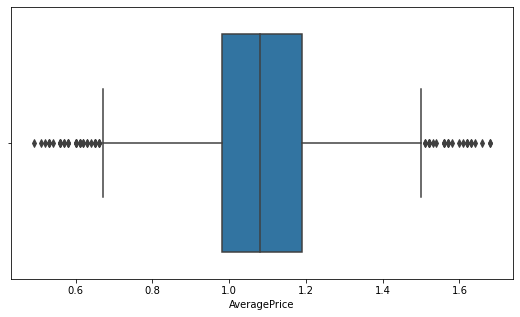

In [51]:
plt.figure(figsize=(9,5))
sns.boxplot('AveragePrice',data=df)

<AxesSubplot:xlabel='Total Volume'>

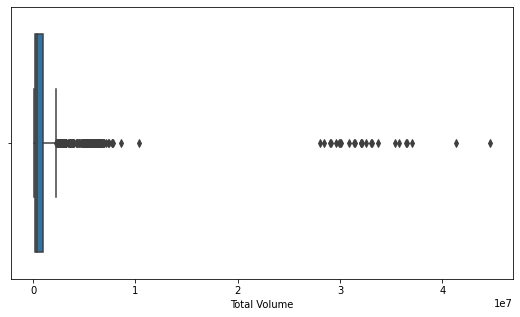

In [52]:
plt.figure(figsize=(9,5))
sns.boxplot('Total Volume',data=df)

In [53]:
df['AveragePrice'].value_counts()

1.08    46
0.99    44
1.03    44
1.10    43
1.09    43
        ..
0.51     1
0.52     1
0.54     1
1.42     1
1.58     1
Name: AveragePrice, Length: 113, dtype: int64

In [54]:
df['Total Volume'].value_counts()

64236.62      1
332918.70     1
4565207.85    1
4831664.77    1
309024.22     1
             ..
141875.20     1
92599.79      1
98097.37      1
162559.72     1
182978.30     1
Name: Total Volume, Length: 1517, dtype: int64

In [55]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


<AxesSubplot:xlabel='AveragePrice', ylabel='count'>

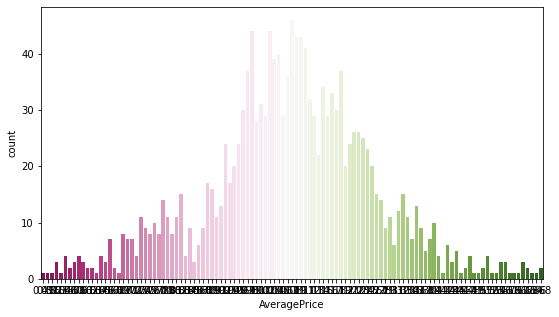

In [56]:
plt.figure(figsize=(9,5))
sns.countplot('AveragePrice',data=df,palette='PiYG')

<AxesSubplot:xlabel='Total Volume', ylabel='count'>

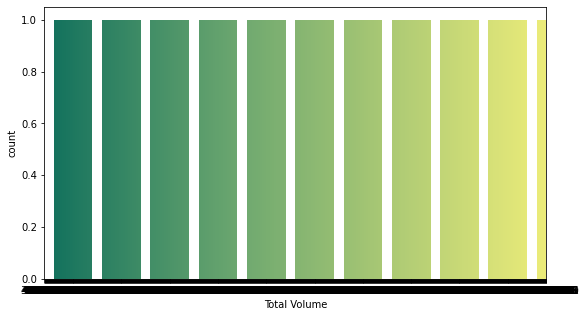

In [57]:
plt.figure(figsize=(9,5))
sns.countplot('Total Volume',data=df,palette='summer')

<AxesSubplot:xlabel='region', ylabel='count'>

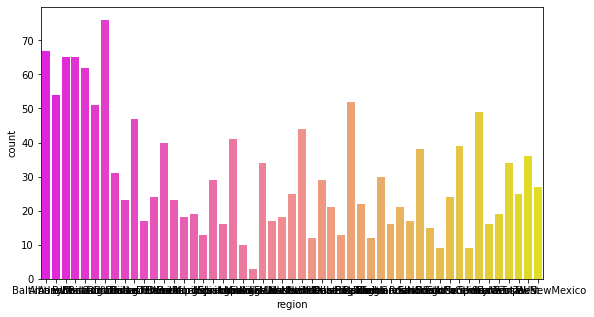

In [58]:
plt.figure(figsize=(9,5))
sns.countplot('region',data=df,palette='spring')

<AxesSubplot:xlabel='type', ylabel='count'>

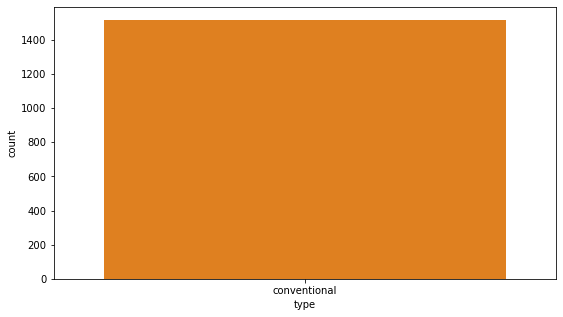

In [59]:
plt.figure(figsize=(9,5))
sns.countplot('type',data=df,palette='autumn')

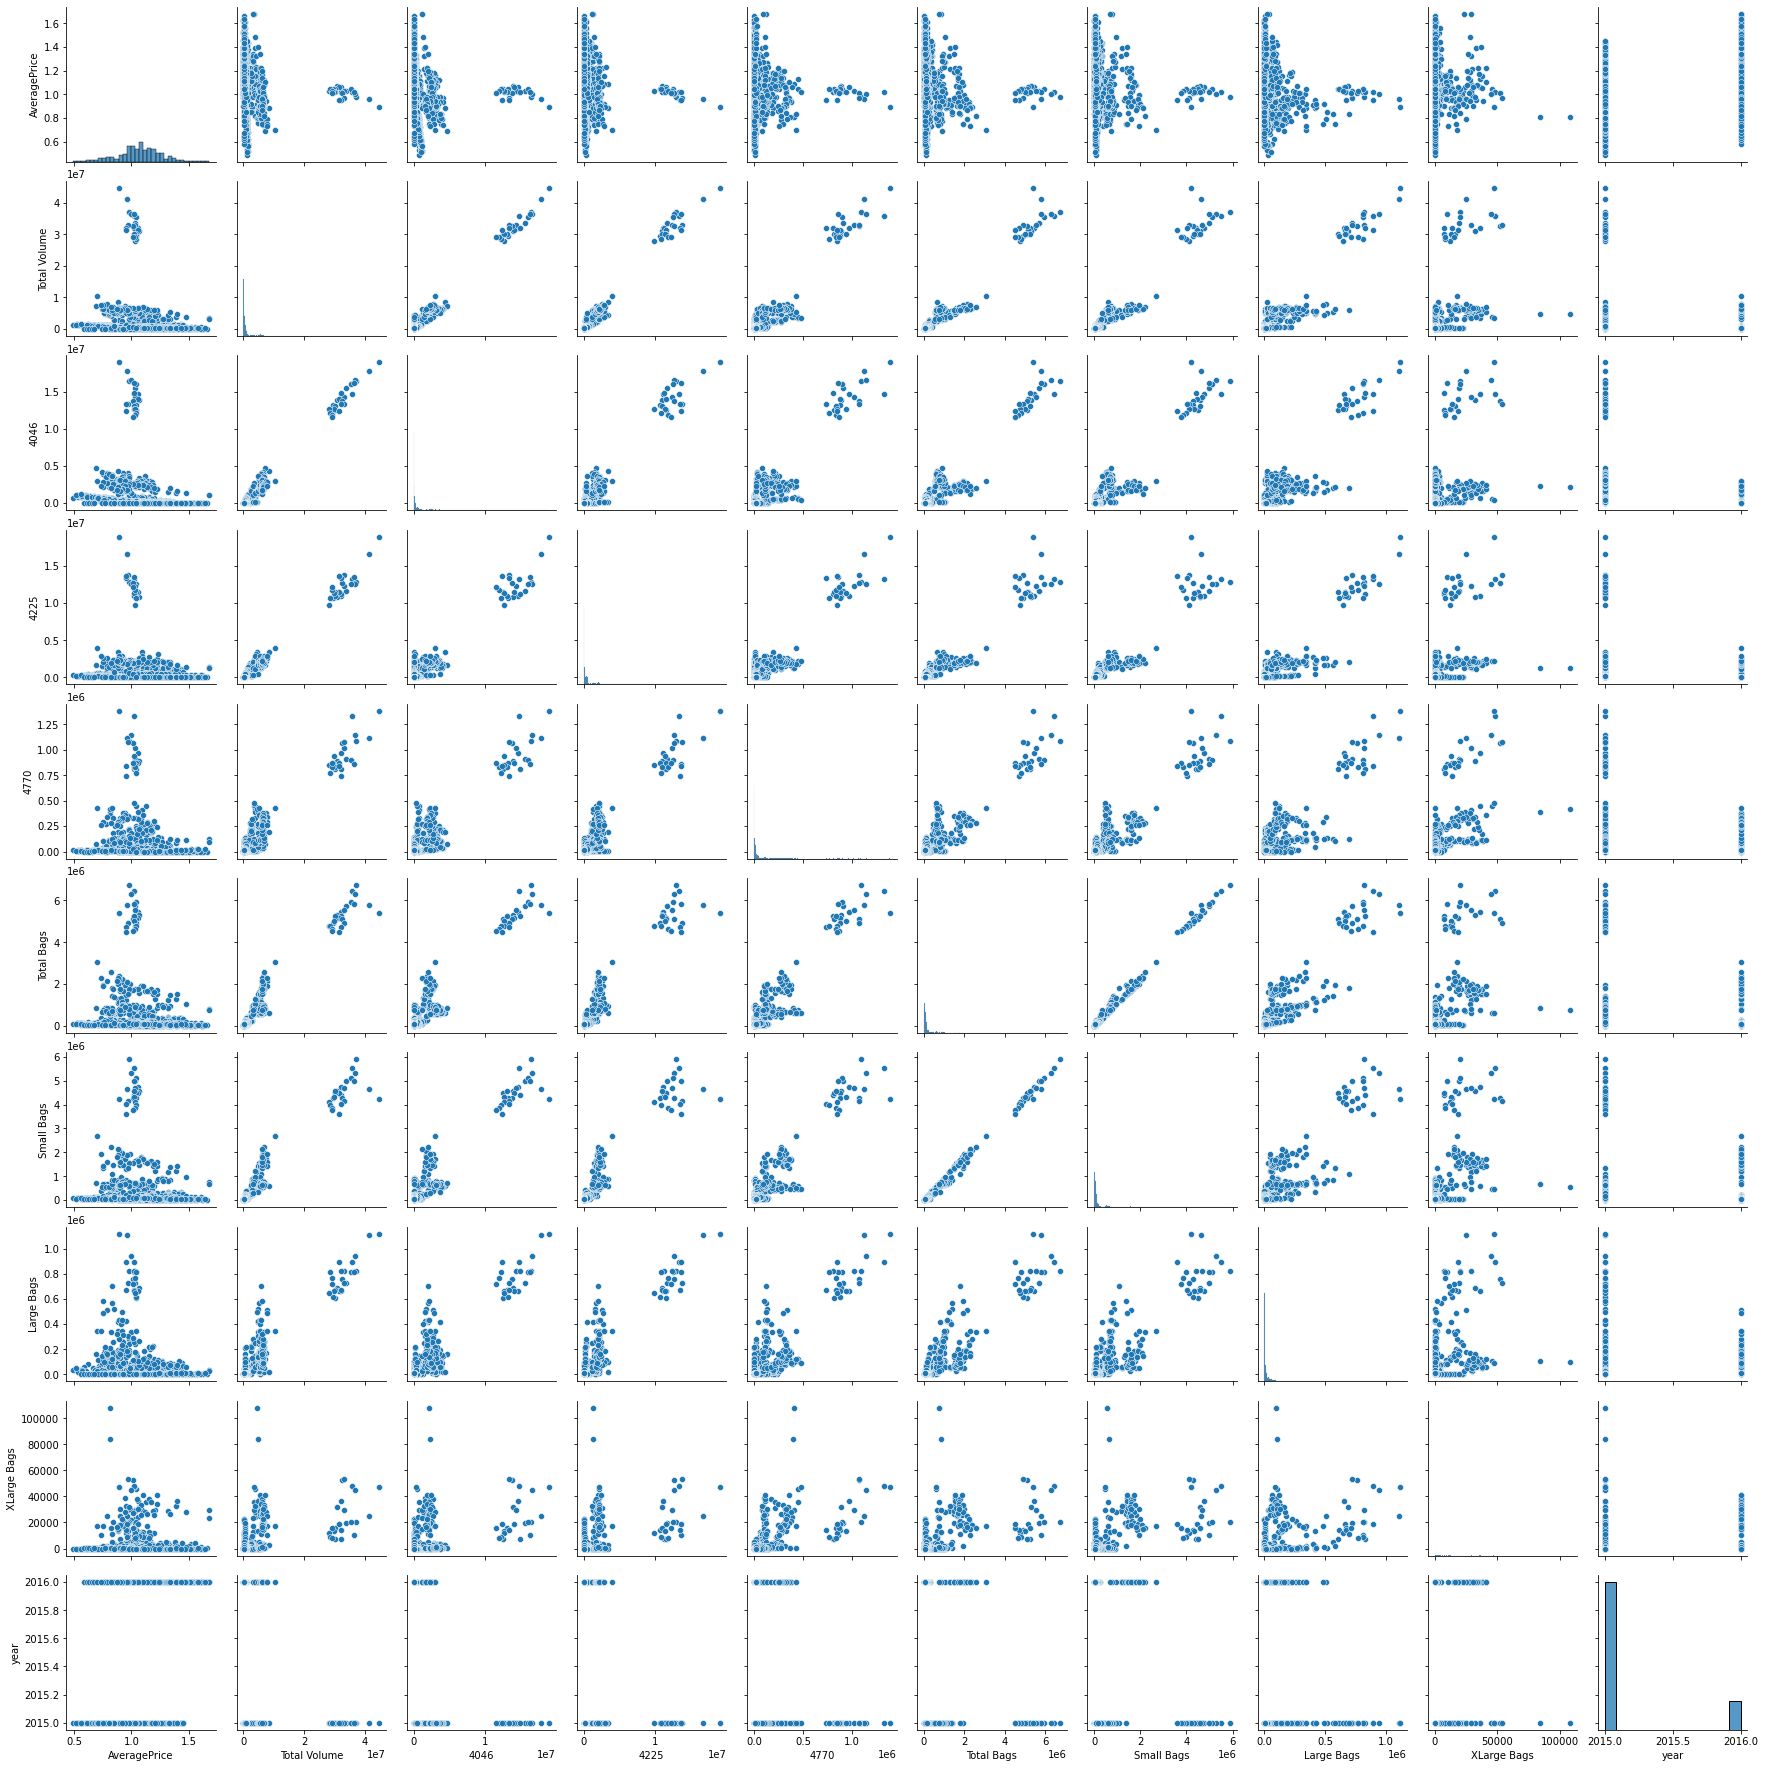

In [60]:
sns.pairplot(df)
plt.savefig('pairplot.png')
plt.show()

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>],
       [<AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>],
       [<AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

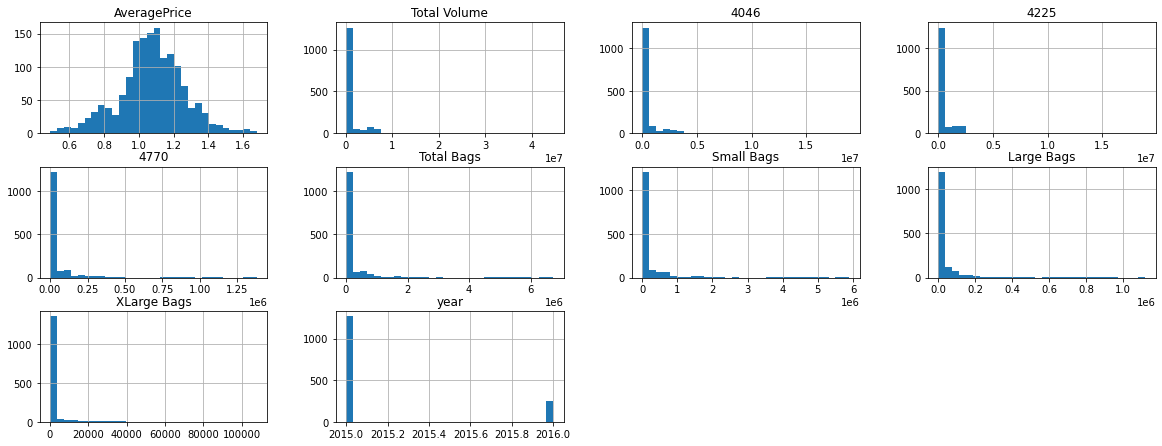

In [61]:
df.hist(figsize=(20,10), grid=True, layout=(4,4), bins=30)

In [62]:
corr=df.corr()
corr

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000


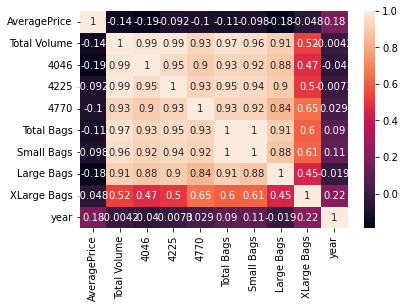

In [63]:
sns.heatmap(corr, annot=True)
plt.yticks(rotation=0)
plt.show()

In [64]:
le = LabelEncoder()
var_mode = df.select_dtypes(include='object').columns

for i in var_mode:
    df[i] = le.fit_transform(df[i])
df    

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,92,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015.0,0
1,68,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015.0,0
2,44,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015.0,0
3,20,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015.0,0
4,98,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,51
16464,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,51
16465,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,51
16466,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,51


In [65]:
df.skew()

Date           -3.892542
AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
type           -2.821090
year            1.828332
region         -3.737989
dtype: float64

In [66]:
skew=('Total Volume' , '4046' , '4225' , '4770' , 'Total Bags' , 'Small Bags' , 'Large Bags' , 'XLarge Bags')
for col in skew :
    if df.skew().loc[col]>0.35:
        df[col] = np.log1p(df[col])

In [67]:
df[col]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
16463    NaN
16464    NaN
16465    NaN
16466    NaN
16467    NaN
Name: XLarge Bags, Length: 16468, dtype: float64

Date                AxesSubplot(0.125,0.71587;0.133621x0.16413)
AveragePrice     AxesSubplot(0.285345,0.71587;0.133621x0.16413)
Total Volume      AxesSubplot(0.44569,0.71587;0.133621x0.16413)
4046             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4225             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
4770               AxesSubplot(0.125,0.518913;0.133621x0.16413)
Total Bags      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Small Bags       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
Large Bags      AxesSubplot(0.606034,0.518913;0.133621x0.16413)
XLarge Bags     AxesSubplot(0.766379,0.518913;0.133621x0.16413)
type               AxesSubplot(0.125,0.321957;0.133621x0.16413)
year            AxesSubplot(0.285345,0.321957;0.133621x0.16413)
region           AxesSubplot(0.44569,0.321957;0.133621x0.16413)
dtype: object

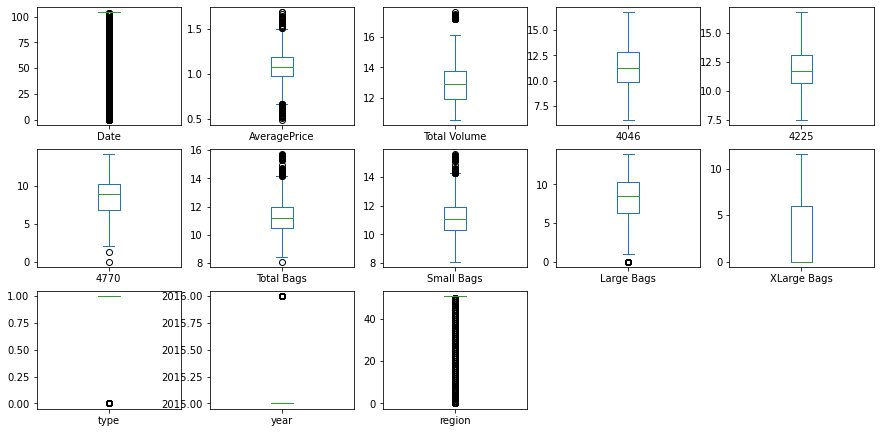

In [68]:
df.plot(kind='box',subplots=True, layout=(4,5), figsize=(15,10))

In [69]:
z = np.abs(zscore(df))
print(z)

           Date  AveragePrice  Total Volume  4046  4225  4770  Total Bags  \
0      0.395139           NaN           NaN   NaN   NaN   NaN         NaN   
1      1.733989           NaN           NaN   NaN   NaN   NaN         NaN   
2      3.072839           NaN           NaN   NaN   NaN   NaN         NaN   
3      4.411690           NaN           NaN   NaN   NaN   NaN         NaN   
4      0.060426           NaN           NaN   NaN   NaN   NaN         NaN   
...         ...           ...           ...   ...   ...   ...         ...   
16463  0.274286           NaN           NaN   NaN   NaN   NaN         NaN   
16464  0.274286           NaN           NaN   NaN   NaN   NaN         NaN   
16465  0.274286           NaN           NaN   NaN   NaN   NaN         NaN   
16466  0.274286           NaN           NaN   NaN   NaN   NaN         NaN   
16467  0.274286           NaN           NaN   NaN   NaN   NaN         NaN   

       Small Bags  Large Bags  XLarge Bags      type  year    region  
0   

In [70]:
from scipy import stats
df_z=pd.DataFrame()
num=df
z=np.abs(stats.zscore(df_z[num]))
a=int(df_z.size)
df_z = df_z[(z>3).all(axis=1)]

In [71]:
df.type.unique()

array([0, 1])

In [72]:
df.year.unique()

array([2015., 2016.,   nan])

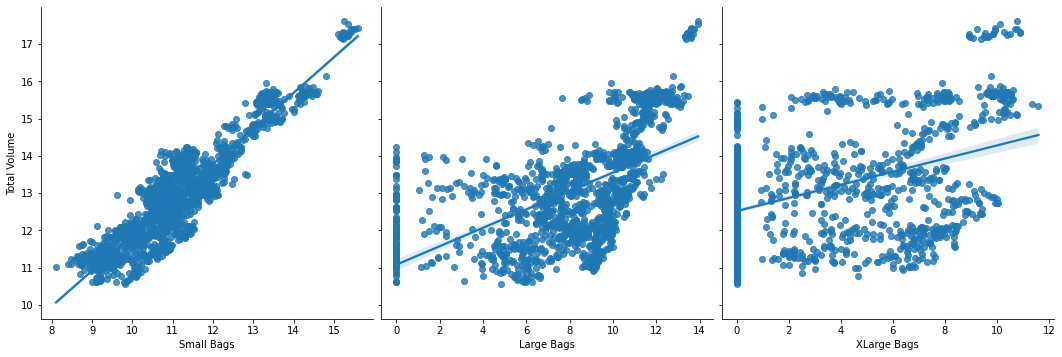

In [73]:
sns.pairplot(df , x_vars=['Small Bags' , 'Large Bags' , 'XLarge Bags'],
                        y_vars='Total Volume' , size=5, aspect=1, kind='reg')

In [74]:
threshold = 3
print(np.where(z<3))
print(df.shape)

(array([], dtype=int64), array([], dtype=int64))
(16468, 13)


[]

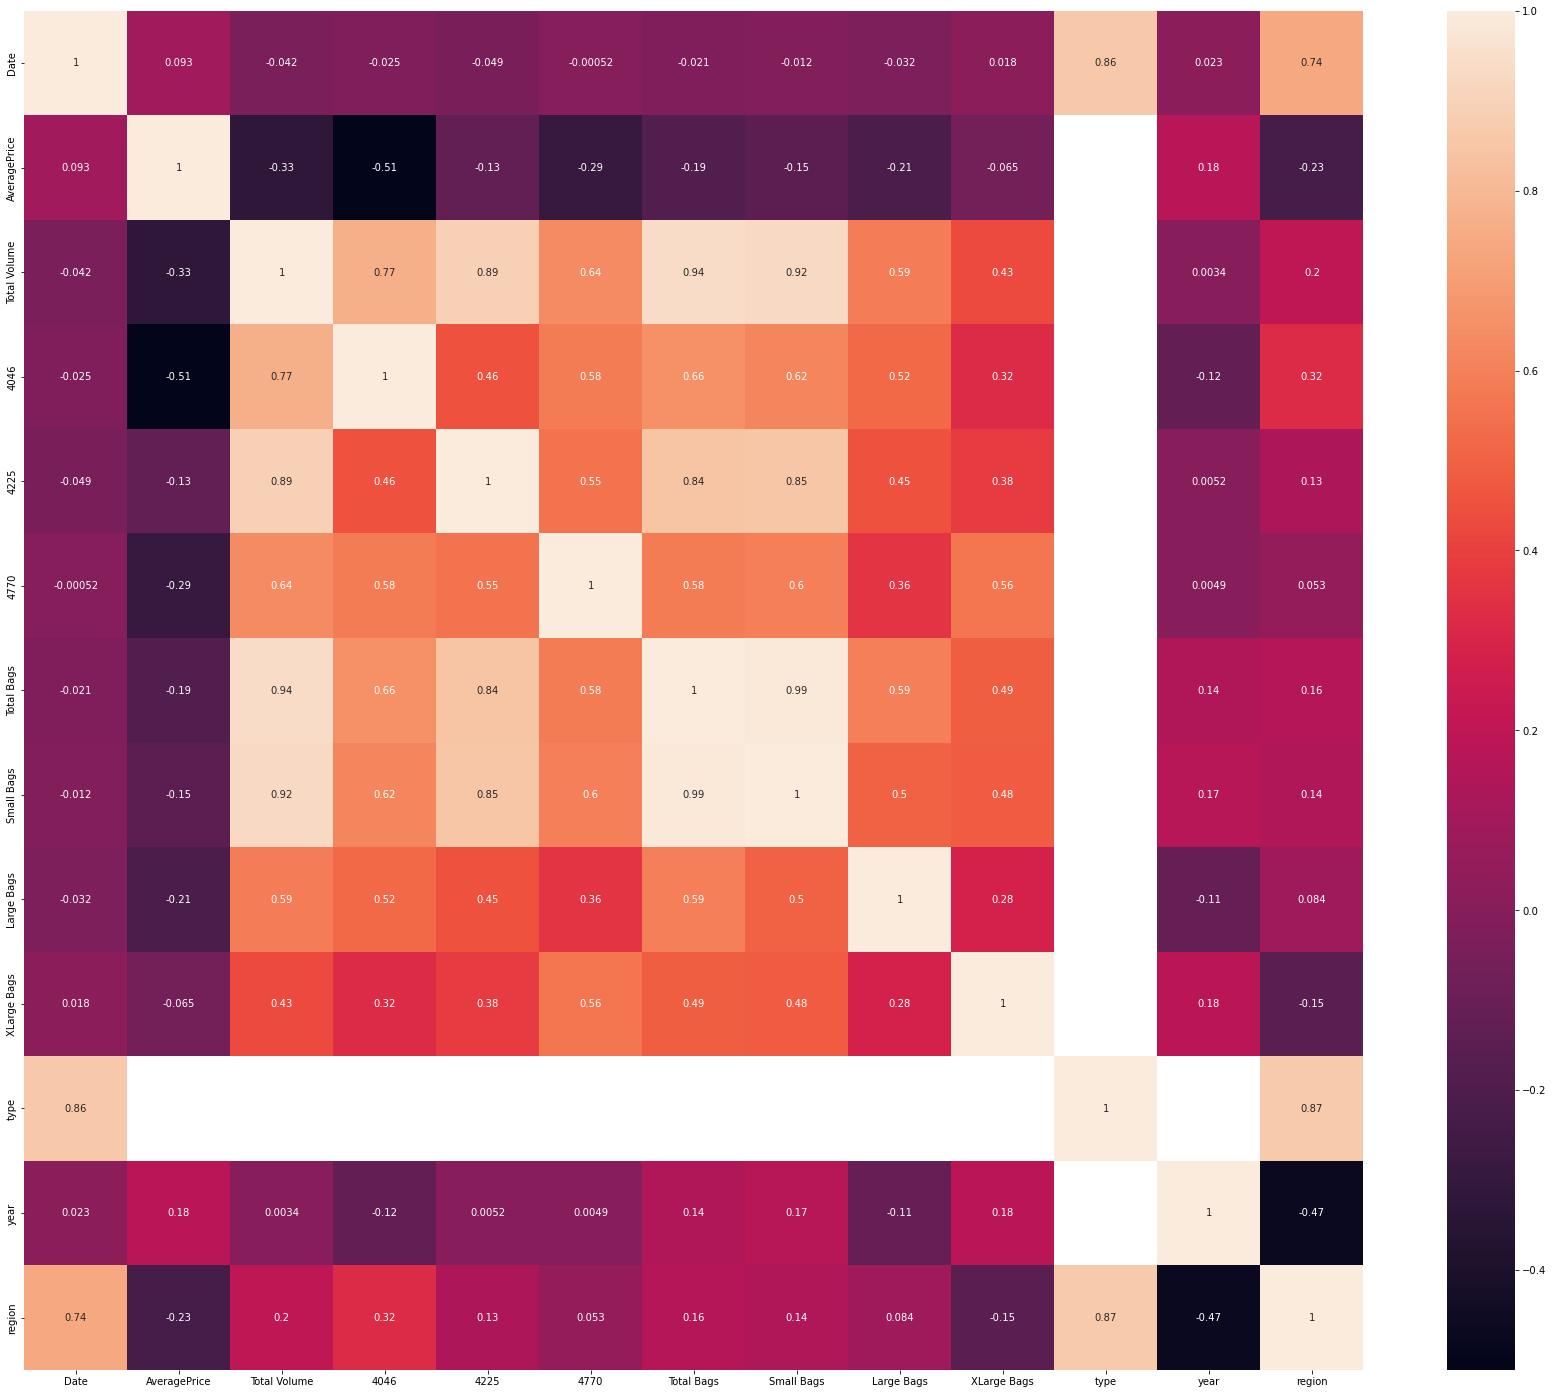

In [75]:
df_corre = df.corr()
plt.figure(figsize=(30,25))
sns.heatmap(df_corre,annot=True)
plt.plot()

Text(0.5, 1.0, 'Yearly Average Price in the  Region')

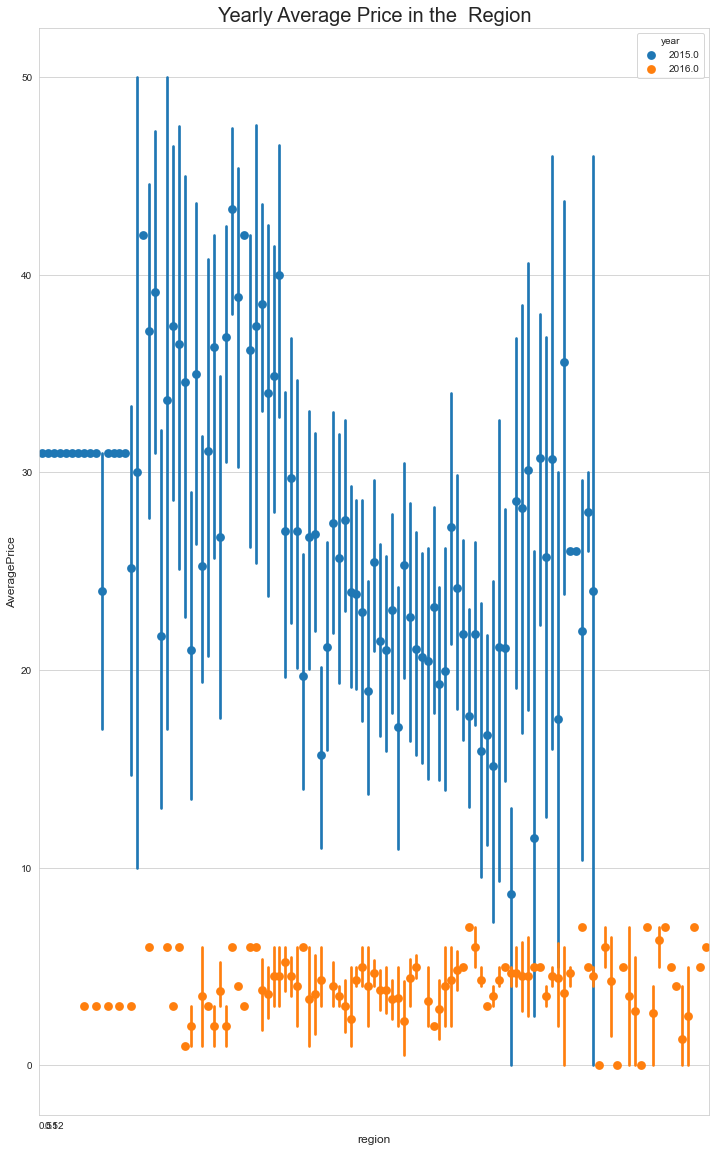

In [76]:
# each region and yearly distribution 
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice',y='region',data=df, hue='year',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('region',{'fontsize' : 'large'})
plt.ylabel('AveragePrice',{'fontsize':'large'})
plt.title("Yearly Average Price in the  Region",{'fontsize':20})

Text(0.5, 1.0, 'Type Average Price in the  Region')

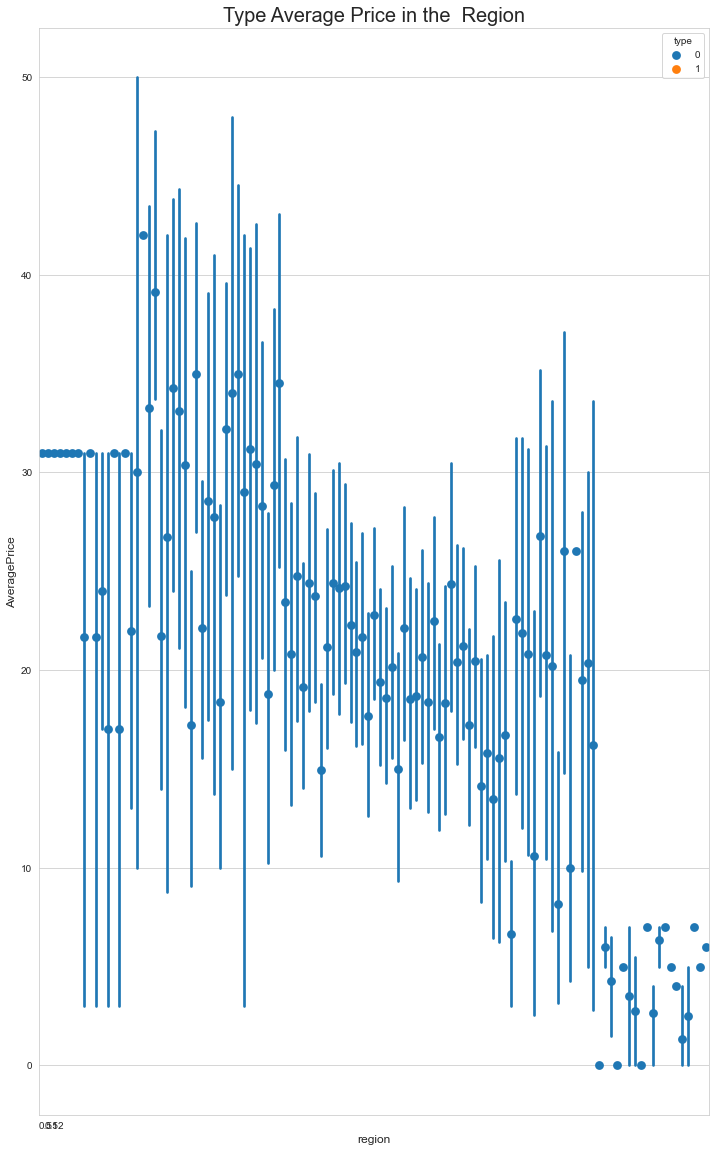

In [77]:
# each region and average price distribution 
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice',y='region',data=df, hue='type',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('region',{'fontsize' : 'large'})
plt.ylabel('AveragePrice',{'fontsize':'large'})
plt.title("Type Average Price in the  Region",{'fontsize':20})

In [78]:
x=df[['AveragePrice' , 'Small Bags' , 'Large Bags' , 'XLarge Bags']]

y=df.type

In [79]:
x_train,x_valid,y_train,y_valid=train_test_split(x,y,test_size=0.2,random_state=22)

In [80]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

algos=[LinearRegression(), Ridge(), Lasso(), DecisionTreeRegressor(), KNeighborsRegressor()]
names = ['Linear Regression' , 'Ridge Regression' , 'Lasso Regression' , 'K Neighbors Regression' , 'Decision Tree Regression']
rmse_list = []

In [81]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=1)
print("x train shape " , x_train.shape)
print("x test shape " , x_test.shape)

print("y train shape ", y_train.shape)
print("y test shape " , y_test.shape)

x train shape  (13174, 4)
x test shape  (3294, 4)
y train shape  (13174,)
y test shape  (3294,)


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn import utils

# convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

#view transformed values
print(y_transformed)

[0 0 0 ... 1 1 1]


In [83]:
print ('Shape                     ------------------>' , df.shape)
print  ('Each Column and data type andits count' , '\n')
print (df.info())

Shape                     ------------------> (16468, 13)
Each Column and data type andits count 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          16468 non-null  int32  
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          16468 non-null  int32  
 11  year          1517 non-null   float64
 12  region        16468 non-null  int32  
dtypes: float64(10), int32(3)
memory usage: 1.4 MB
None


In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [85]:
print(x.shape,x_train.shape,x_test.shape)

(16468, 4) (13174, 4) (3294, 4)


In [86]:
from xgboost import XGBRegressor
regressor = XGBRegressor()

In [87]:
regressor.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [88]:
df_predict=regressor.predict(x_train)

In [89]:
from sklearn import metrics
r2_AveragePrice = metrics.r2_score(y_train,df_predict)
print('R Squared Value = ',r2_AveragePrice)

R Squared Value =  0.9999999994556039


In [90]:
data_predict = regressor.predict(x_test)

In [91]:
r2_data=metrics.r2_score(y_test,data_predict)

In [92]:
print('R squared Value = ',r2_data)

R squared Value =  0.9999999994555355


In [93]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [94]:
x_c = df.drop(columns=['region' , 'Date'])
y_c = df[["region"]]
print(x_c.shape)
print(y_c.shape)

(16468, 11)
(16468, 1)


In [95]:
sc = StandardScaler()
sc.fit_transform(x_c)
x_c = pd.DataFrame(x_c, columns=x_c.columns)

In [96]:
x_c

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,2015.0
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,2015.0
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,2015.0
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,2015.0
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,2015.0
...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [97]:
df.corr()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,1.000000,0.092984,-0.041561,-0.024998,-0.048532,-0.000523,-0.021240,-0.011971,-0.031706,0.018117,0.861086,0.022750,0.742238
AveragePrice,0.092984,1.000000,-0.326692,-0.511040,-0.129466,-0.289056,-0.190092,-0.149251,-0.214802,-0.064988,NaN,0.178683,-0.229408
Total Volume,-0.041561,-0.326692,1.000000,0.767171,0.890715,0.639882,0.938095,0.924203,0.587667,0.429998,NaN,0.003417,0.198022
4046,-0.024998,-0.511040,0.767171,1.000000,0.456283,0.584634,0.655837,0.620573,0.522558,0.322105,NaN,-0.124610,0.324688
4225,-0.048532,-0.129466,0.890715,0.456283,1.000000,0.552522,0.843787,0.851278,0.453820,0.382615,NaN,0.005161,0.134603
4770,-0.000523,-0.289056,0.639882,0.584634,0.552522,1.000000,0.584306,0.597229,0.361404,0.563302,NaN,0.004865,0.052908
Total Bags,-0.021240,-0.190092,0.938095,0.655837,0.843787,0.584306,1.000000,0.985506,0.594606,0.490465,NaN,0.138461,0.158998
Small Bags,-0.011971,-0.149251,0.924203,0.620573,0.851278,0.597229,0.985506,1.000000,0.499521,0.480714,NaN,0.168024,0.143571
Large Bags,-0.031706,-0.214802,0.587667,0.522558,0.453820,0.361404,0.594606,0.499521,1.000000,0.283456,NaN,-0.112991,0.084499
XLarge Bags,0.018117,-0.064988,0.429998,0.322105,0.382615,0.563302,0.490465,0.480714,0.283456,1.000000,NaN,0.180988,-0.154524


In [98]:
type(df.corr())

pandas.core.frame.DataFrame

In [99]:
df.corr().T

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,1.000000,0.092984,-0.041561,-0.024998,-0.048532,-0.000523,-0.021240,-0.011971,-0.031706,0.018117,0.861086,0.022750,0.742238
AveragePrice,0.092984,1.000000,-0.326692,-0.511040,-0.129466,-0.289056,-0.190092,-0.149251,-0.214802,-0.064988,NaN,0.178683,-0.229408
Total Volume,-0.041561,-0.326692,1.000000,0.767171,0.890715,0.639882,0.938095,0.924203,0.587667,0.429998,NaN,0.003417,0.198022
4046,-0.024998,-0.511040,0.767171,1.000000,0.456283,0.584634,0.655837,0.620573,0.522558,0.322105,NaN,-0.124610,0.324688
4225,-0.048532,-0.129466,0.890715,0.456283,1.000000,0.552522,0.843787,0.851278,0.453820,0.382615,NaN,0.005161,0.134603
4770,-0.000523,-0.289056,0.639882,0.584634,0.552522,1.000000,0.584306,0.597229,0.361404,0.563302,NaN,0.004865,0.052908
Total Bags,-0.021240,-0.190092,0.938095,0.655837,0.843787,0.584306,1.000000,0.985506,0.594606,0.490465,NaN,0.138461,0.158998
Small Bags,-0.011971,-0.149251,0.924203,0.620573,0.851278,0.597229,0.985506,1.000000,0.499521,0.480714,NaN,0.168024,0.143571
Large Bags,-0.031706,-0.214802,0.587667,0.522558,0.453820,0.361404,0.594606,0.499521,1.000000,0.283456,NaN,-0.112991,0.084499
XLarge Bags,0.018117,-0.064988,0.429998,0.322105,0.382615,0.563302,0.490465,0.480714,0.283456,1.000000,NaN,0.180988,-0.154524


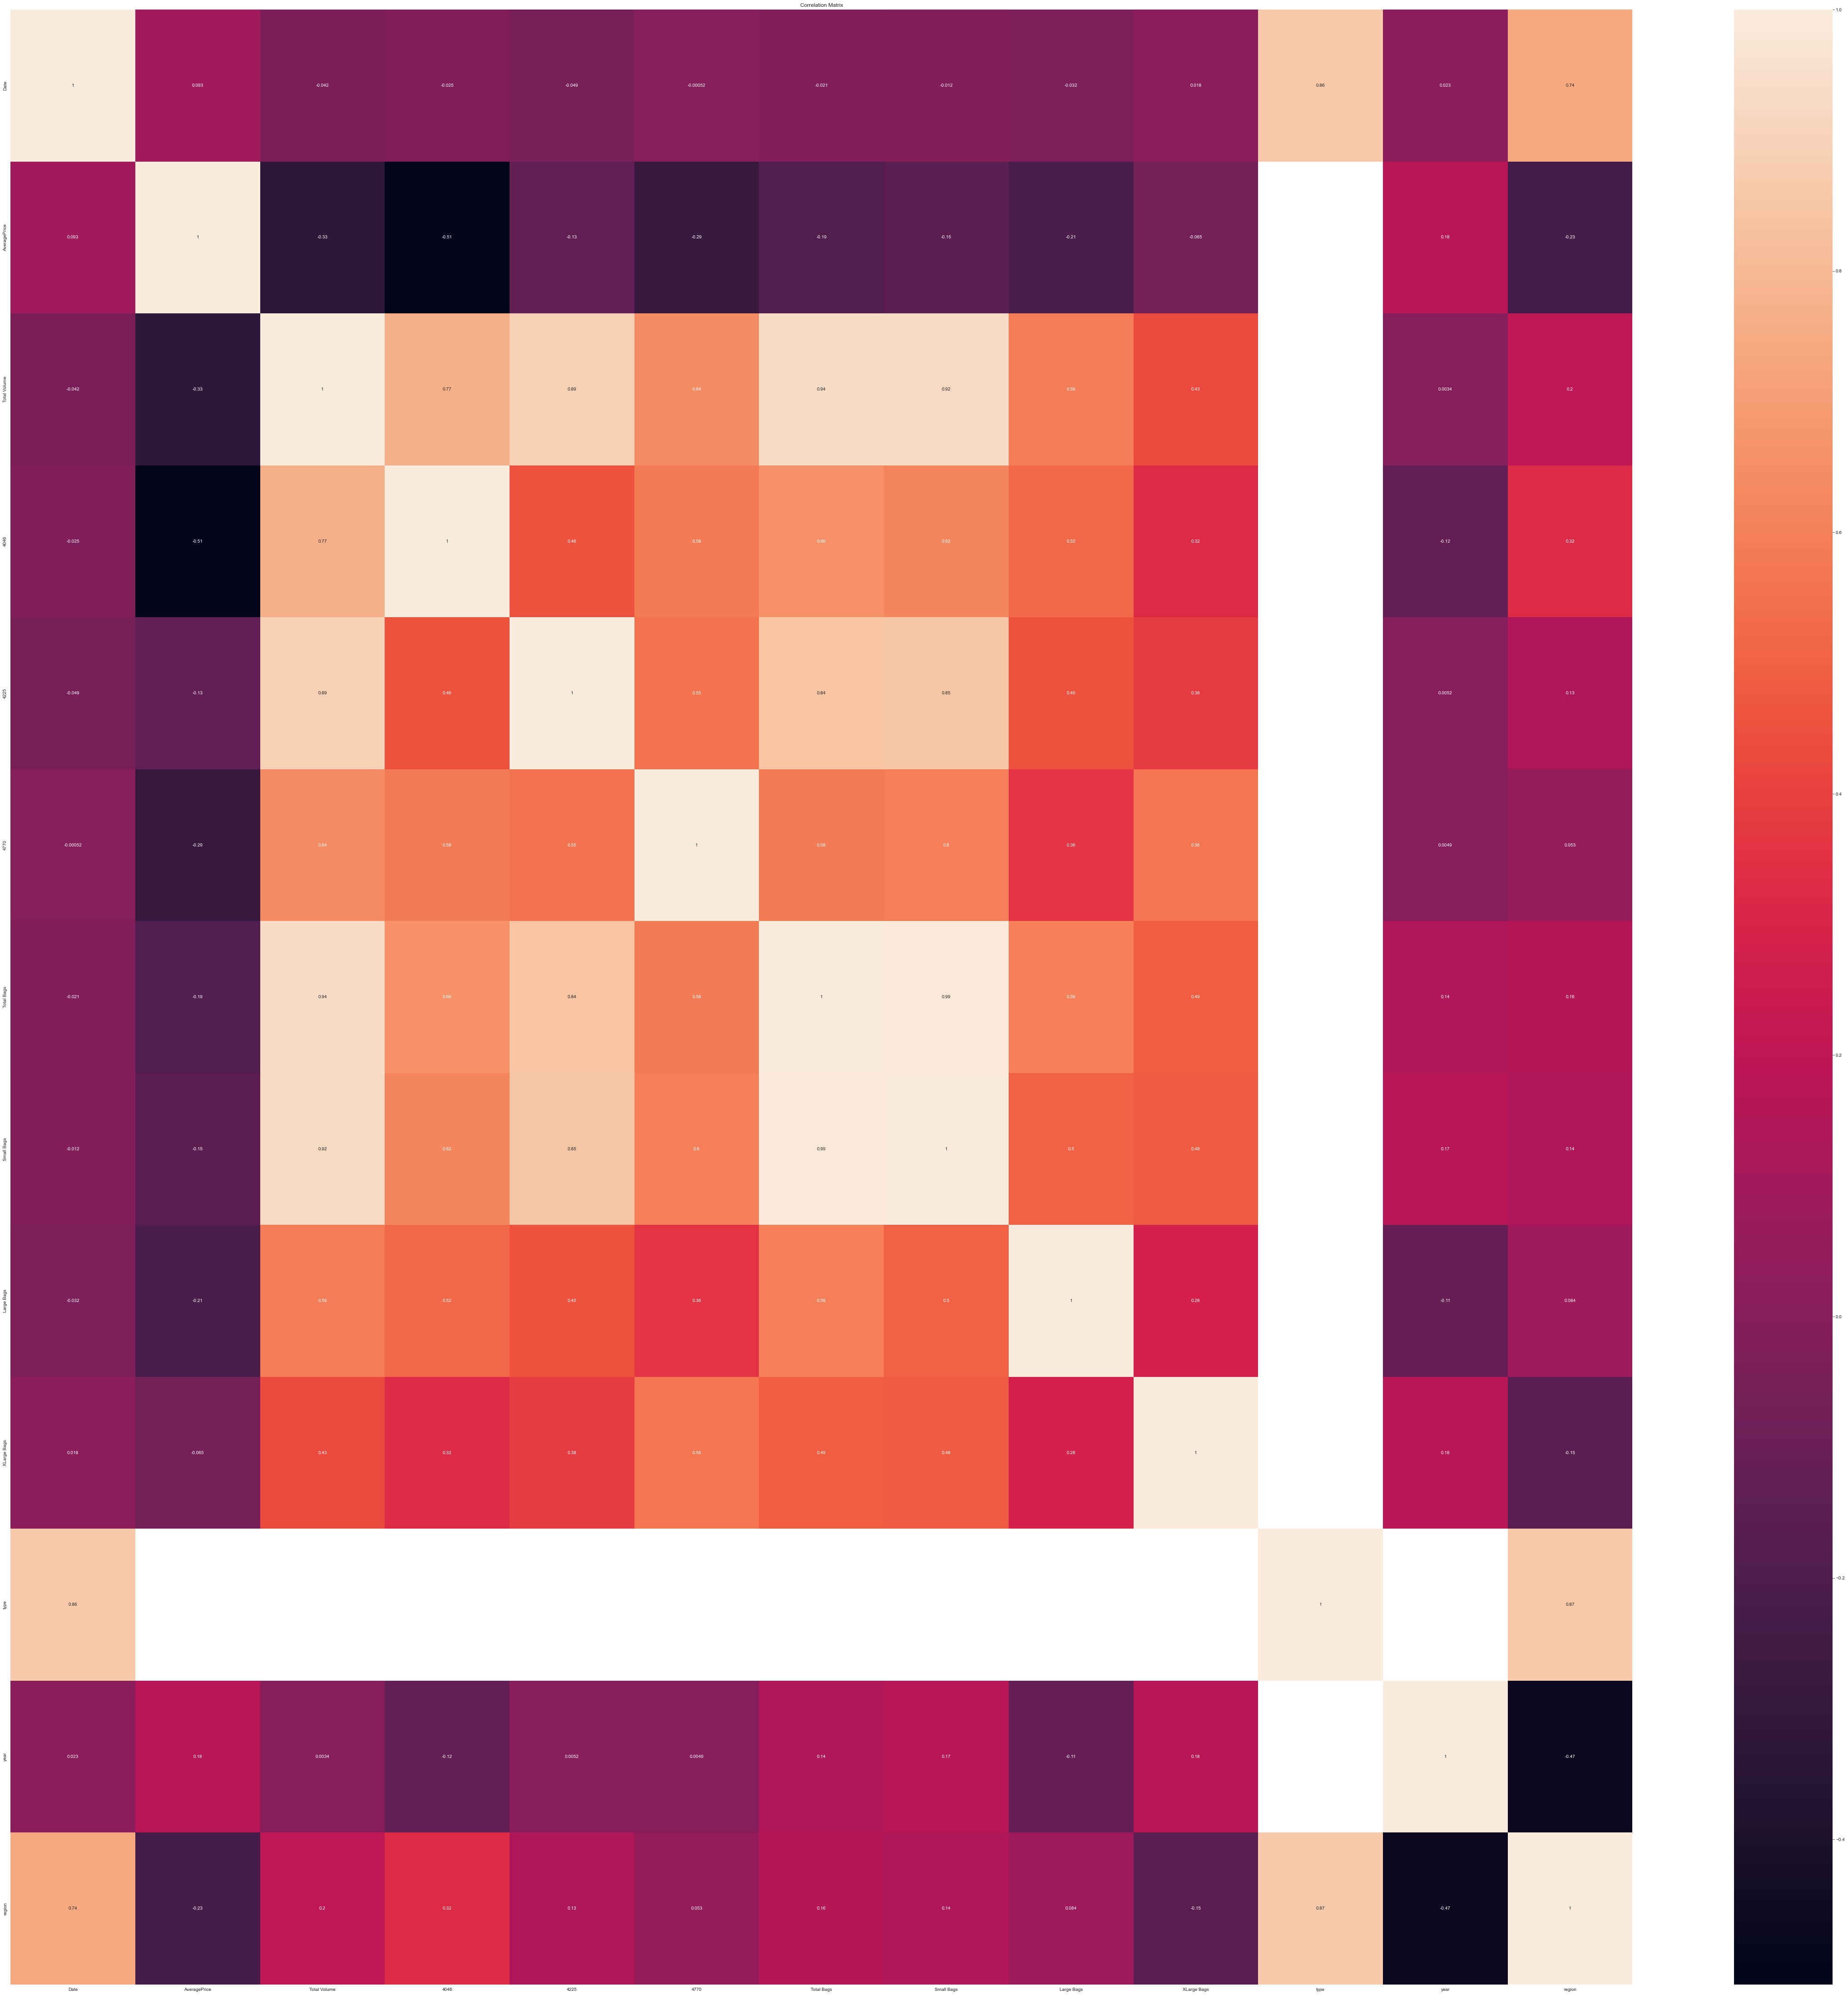

In [100]:
corr_mat = df.corr()
plt.figure(figsize=[80,80])
sns.heatmap(corr_mat, annot = True)
plt.title("Correlation Matrix")
plt.savefig('ccorrelation_matrix.jpg')
plt.show()

In [101]:
df.dtypes

Date              int32
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year            float64
region            int32
dtype: object

In [102]:
corr_matrix=df.corr()
corr_matrix["region"].sort_values(ascending=False)

region          1.000000
type            0.869561
Date            0.742238
4046            0.324688
Total Volume    0.198022
Total Bags      0.158998
Small Bags      0.143571
4225            0.134603
Large Bags      0.084499
4770            0.052908
XLarge Bags    -0.154524
AveragePrice   -0.229408
year           -0.470472
Name: region, dtype: float64

In [103]:
type(corr_matrix)

pandas.core.frame.DataFrame

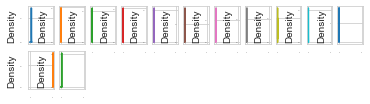

In [104]:
# check distribution among all the columns

df.plot(kind='density' , subplots = True, layout=(5,11), legend=False, fontsize=-1)
plt.show()

# 

# THANK YOU